# 1. 서포트 벡터 머신의 근본 아이디어는 무엇인가?

SVM의 기본 근본적인 아이디어는 클래스 사이에 가능한 한 가장 넓은 도로를 내는 것

즉, 두 클래스를 구분하는 결정 경계와 샘플 사이의 마진을 가능한 한 가장 크게 하는 것이 목적이다

소프트 마진 분류를 수행할 때는 SVM이 두 클래스를 완벽하게 나누는 것과 가장 넓은 도로를 만드는 것 사이에 절충안을 찾는다(즉, 몇 개의 샘플은 도로 안에 놓일 수 있다)

또 하나의 핵심적인 아이디어는 비선형 데이터셋에서 훈련할 때 커널 함수를 이용하는 것

# 2. 서포트 벡터가 무엇인가?

**서포트 벡터**는 SVM이 훈련된 후에 경계를 포함해서 도로에 놓인 샘플들이며 결정 경계는 전적으로 서포트 벡터에 의해 결정된다

서포트 벡터가 아닌 어떤 샘플도 영향을 주지 못한다

이런 샘플은 삭제하고 다른 샘플을 더 추가하거나 다른 곳으로 이동할 수 있다

샘플이 도로 밖에 있는 한 결정 경계에 영향을 주지 못한다

예측을 계산할 때에는 전체 훈련 세트가 아니라 서포트 벡터만 관여한다

# 3. SVM을 사용할 때 입력값의 스케일이 중요한 이유는 무엇인가?

SVM은 클래스 사이에 가능한 한 가장 큰 도로를 내는 것이기 때문에 훈련 세트의 스케일이 맞지 않으면 크기가 작은 특성이 무시되는 경향이 있다

# 4. SVM 분류기가 샘플을 분류할 때 신뢰도 점수와 확률을 출력할 수 있는가?

SVM 분류기는 테스트 샘플과 결정 경계 사이의 거리를 출력할 수 있으므로 이를 신뢰도 점수로 사용할 수 있다

하지만 이 점수를 클래스 확률의 추정값으로 바로 변환할 수는 없다

사이킷런에서 SVM 모델을 만들 때 `probability=True`로 설정하면 훈련이 끝난 후 SVM의 점수에 로지스틱 회귀를 훈련시켜 확률을 계산한다

이 설정은 SVM 모델에 `predict_proba()`와 `predict_log_proba()` 메서드를 추가시킨다

# 5. 수백만 개의 샘플과 수백 개의 특성을 가진 훈련 세트에 SVM 모델을 훈련시키려면 원 문제와 쌍대 문제 중 어떤 것을 사용해야 하는가?

# 6. RBF 커널을 사용해 SVM 분류기를 훈련시켰더니 훈련 세트에 과소적합 되었다고 판단되는 상황에서 $\gamma$를 증가시켜야 하는가, 감소시켜야 하는가? C의 경우는 어떤가?

RBF 커널에 훈련된 SVM 분류기가 훈련 세트에 과소적합이라면 규제가 너무 큰 것일 수 있기 때문에 $\gamma$나 C값을 증가시켜야 한다 

# 7. 이미 만들어진 QP 알고리즘 라이브러리를 사용해 소프트 마진 선형 SVM 분류기를 학습시키려면 QP 매개변수 ($\mathbf{H, f, A, b}$)를 어떻게 지정해야 하는가?

# 8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보기
# 그 다음 같은 데이터셋에 SVC와 SGDClassifier 적용해보기
# 결과적으로 거의 비슷한 모델이 만들어지는지 확인하기

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5 
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss = 'hinge', C = C, random_state = 42)
svm_clf = SVC(kernel = 'linear', C = C)
sgd_clf = SGDClassifier(loss = 'hinge', learning_rate = 'constant', eta0 = 0.001, alpha = alpha,
                        max_iter = 1000, tol = 1e-3, random_state = 42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print('LinearSVC                   :', lin_clf.intercept_, lin_clf.coef_)
print('SVC                         :', svm_clf.intercept_, svm_clf.coef_)
print('SGDClassifier(alpha={:.5f}):'.format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC                   : [0.28475098] [[1.05364854 1.09903804]]
SVC                         : [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


3개 모델의 결정 경계 그려보기

In [9]:
lin_clf.coef_

array([[1.05364854, 1.09903804]])

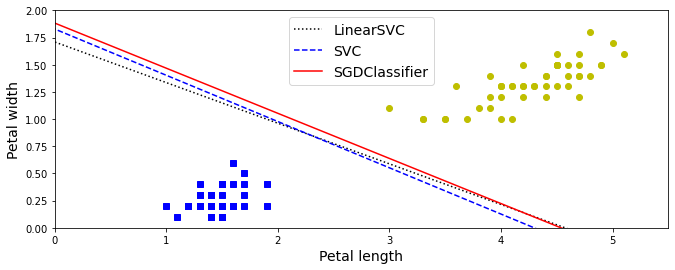

In [13]:
import matplotlib.pyplot as plt
# 각 결정 경계의 기울기와 편향 계산
w1 = -lin_clf.coef_[0,0]/lin_clf.coef_[0,1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0,1]
w2 = -svm_clf.coef_[0,0]/svm_clf.coef_[0,1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0,1]
w3 = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]

# 결정 경계를 원본 스케일로 변환
line1 = scaler.inverse_transform([[-10,-10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10,-10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10,-10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계 그리기
plt.figure(figsize = (11,4))
plt.plot(line1[:,0],line1[:,1],'k:', label = 'LinearSVC')
plt.plot(line2[:,0],line2[:,1],'b--', label = 'SVC')
plt.plot(line3[:,0],line3[:,1],'r-', label = 'SGDClassifier')
plt.plot(X[:,0][y==0],X[:,1][y==0], 'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1], 'yo')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'upper center', fontsize = 14)
plt.axis([0,5.5,0,2])
plt.show()

각 모델의 결정 경계가 아주 유사함

# 9. MNIST 데이터셋에 SVM 분류기 훈련(SVM 분류기는 이진 분류기라서 OvR 전략을 사용해 10개의 숫자를 분리해야 한다) 처리 속도를 높이기 위해 작은 검증 세트로 하이퍼파라미터를 조정하는 것이 좋은데, 최종적으로 어느 정도까지 정확도를 높일 수 있는가?

In [16]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, cache = True)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

선형 SVM 분류기 (자동으로 OvA 또는 OvR 전략을 사용하므로 특별히 처리해줄 것이 없음)

In [10]:
lin_clf = LinearSVC(random_state = 42)
lin_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

훈련 세트에 대한 예측을 만들어 정확도 측정(최종 모델이 아니므로 테스트 세트 사용하면 안 됨)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

MNIST에서 83.48%의 정확도는 나쁜 성능이라고 볼 수 있다

선형 모델이 너무 단순하기 때문이기도 하지만 먼저 데이터의 스케일을 조정할 필요가 있음

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [13]:
lin_clf = LinearSVC(random_state = 42)
lin_clf.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [14]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9217333333333333

훨씬 나아졌지만 여전히 MNIST 데이터셋에서 좋은 성능은 아니다

SVM에서는 커널 함수를 사용해야 한다(RBF 커널(기본값)로 `SVC` 적용)

In [17]:
svm_clf = SVC(gamma = 'scale')
svm_clf.fit(X_train_scaled, y_train)

SVC()

In [18]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9866333333333334

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma' : reciprocal(0.001, 0.1), 'C' : uniform(0,10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter = 10, verbose = 2, cv = 3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.174031932778697, gamma=0.06236006404471946 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=3.174031932778697, gamma=0.06236006404471946, total=   0.9s
[CV] C=3.174031932778697, gamma=0.06236006404471946 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ... C=3.174031932778697, gamma=0.06236006404471946, total=   0.9s
[CV] C=3.174031932778697, gamma=0.06236006404471946 ..................
[CV] ... C=3.174031932778697, gamma=0.06236006404471946, total=   0.9s
[CV] C=4.329185855019576, gamma=0.0025134717340896296 ................
[CV] . C=4.329185855019576, gamma=0.0025134717340896296, total=   0.8s
[CV] C=4.329185855019576, gamma=0.0025134717340896296 ................
[CV] . C=4.329185855019576, gamma=0.0025134717340896296, total=   0.8s
[CV] C=4.329185855019576, gamma=0.0025134717340896296 ................
[CV] . C=4.329185855019576, gamma=0.0025134717340896296, total=   0.8s
[CV] C=9.123221457188158, gamma=0.0016490919265816867 ................
[CV] . C=9.123221457188158, gamma=0.0016490919265816867, total=   0.7s
[CV] C=9.123221457188158, gamma=0.0016490919265816867 ................
[CV] . C=9.123221457188158, gamma=0.0016490919265816867, total=   0.7s
[CV] C=9.123221457188158, gamma=0.0016490919265816867 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   25.5s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FD7248700>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FD7248610>},
                   verbose=2)

In [20]:
rnd_search_cv.best_estimator_

SVC(C=9.123221457188158, gamma=0.0016490919265816867)

In [21]:
rnd_search_cv.best_score_

0.8609957262651874

In [22]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=9.123221457188158, gamma=0.0016490919265816867)

In [23]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9995333333333334

In [24]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9716

# 10. 캘리포니아 주택 가격 데이터에 SVM 회귀 훈련

In [25]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing['data']
y = housing['target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

간단한 `LinearSVR` 훈련

In [30]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state = 42)
lin_svr.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=42)

훈련 세트에 대한 성능 확인

In [31]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

RMSE 확인

In [32]:
import numpy as np

rmse = np.sqrt(mse)
rmse

0.9819256687727764

훈련 세트에서 타깃값은 만달러 단위이므로, 이 모델의 에러가 대략 \$10,000 정도일 것이라고 예측할 수 있음(즉, 성능이 좋지 못한 모델)

RBF 커널 시도해보기(하이퍼파라미터 `C`와 `gamma`의 적절한 값을 찾기 위해서 교차 검증을 사용한 랜덤 서치 사용)

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {'gamma' : reciprocal(0.001,0.1), 'C' : uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter = 10, verbose = 2, cv = 3, random_state = 42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.1s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.0s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.6s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.4s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FD72B0E50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021FD7224B50>},
                   random_state=42, verbose=2)

In [37]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [40]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
rmse

0.5727524770785357

이 모델 선택하고 테스트 세트에서 성능 확인

In [41]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.5929168385528746